# Importing libraries

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import urllib

# Function to read image from URL

In [0]:
# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
img = url_to_image('https://www.harborfreight.com/media/catalog/product/i/m/image_11249.jpg')
img_og = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [121]:
np.shape(img)

(1200, 1200, 3)

# Filter neutral colors (shades of gray)

In [0]:
def filter_neutral_colors(img_og, lower = (0, 0, 0), upper = (0, 0,100)):
  
    
  plt.imshow(img_og)
  plt.show()
  
  ## convert to hsv
  hsv = cv2.cvtColor(img_og, cv2.COLOR_BGR2HSV)

  ## mask of gray (0,0,0) ~ (0, 0,255)
  mask = cv2.inRange(hsv, lower, upper)

  ## filter out gray colours (convert them to white, which will be excluded at the end)
  img_filtered = cv2.bitwise_and(img_og,img_og, mask=cv2.bitwise_not(mask))

  
  print("Original sum check: ",np.sum(img_og))
  
  plt.imshow(img_filtered)
  plt.show()
  
  print("Filtered sum check: ",np.sum(img_filtered))
  return img_filtered

In [123]:
np.sum(mask)

4865910

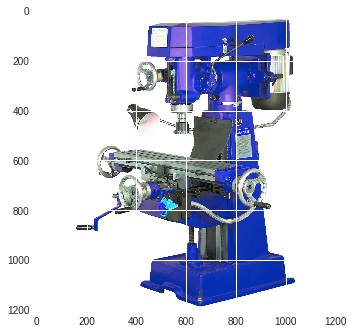

Original sum check:  856054912


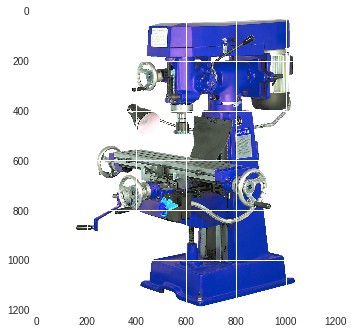

Filtered sum check:  855612736


In [124]:
img_filtered = filter_neutral_colors(img_og, lower = (0, 0, 0), upper = (500, 10,100))

In [0]:
img = cv2.cvtColor(img_filtered, cv2.COLOR_BGR2RGB)


# Define number of clusters for K-Means (number of dominant colors to identify)

In [0]:
k_clusters = 4

# Fit KMeans on non-neutral image

In [127]:
img = img.reshape((img.shape[0] * img.shape[1],3)) #represent as row*column,channel number
clt = KMeans(n_clusters=k_clusters) #cluster number
clt.fit(img)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [162]:
np.unique(clt.labels_)

array([0, 1, 2, 3], dtype=int32)

In [0]:
filtered_clusters = np.asarray([x for x in (clt.cluster_centers_) if (x < 250).all()])

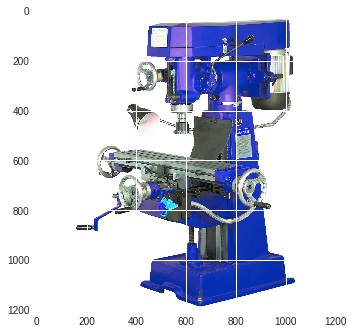

In [164]:
#Show the image with matplotlib
plt.imshow(img_og)
plt.show()


In [155]:
filtered_clusters

array([[ 70.62593761,  68.69052506,  65.05672437],
       [168.68381142, 154.20463004, 147.48781912],
       [176.62898756,  54.00923064,  29.95877598]])

# Dominant color in Hex format

In [0]:
def clamp(x): 
  return int(max(0, min(x, 255)))



In [171]:
dominant_hex_colors = []
for i in (filtered_clusters):
  
  hex = "#{0:02x}{1:02x}{2:02x}".format(clamp(i[0]), clamp(i[1]), clamp(i[2]))
  
  print(hex)
  
  dominant_hex_colors.append(hex)
dominant_hex_colors

#464441
#a89a93
#b0361d


['#464441', '#a89a93', '#b0361d']

# Final Function to extract dominant colors 

In [0]:
def extract_dominant_colors(url, k_clusters = 4):
  img = url_to_image(url)
  
  img_og = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  
  img_filtered = filter_neutral_colors(img_og, lower = (0, 0, 0), upper = (500, 10,100))
  
  img = cv2.cvtColor(img_filtered, cv2.COLOR_BGR2RGB)
  
  img = img.reshape((img.shape[0] * img.shape[1],3)) #represent as row*column,channel number
  clt = KMeans(n_clusters=k_clusters) #cluster number
  clt.fit(img)
  
  
  KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

  filtered_clusters = np.asarray([x for x in (clt.cluster_centers_) if (x < 250).all()])
  
  dominant_hex_colors = []
  for i in (filtered_clusters):

    hex = "#{0:02x}{1:02x}{2:02x}".format(clamp(i[0]), clamp(i[1]), clamp(i[2]))

    print(hex)

    dominant_hex_colors.append(hex)
  return dominant_hex_colors

## Fucntion Call and filtered images

In [0]:
url_list = ['https://images.unsplash.com/photo-1504714146340-959ca07e1f38?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&w=1000&q=80'
            ,'https://images.unsplash.com/photo-1476610182048-b716b8518aae?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&w=1000&q=80',
           'https://image.shutterstock.com/image-photo/waterfall-landscape-scenery-260nw-781328740.jpg',
           'https://i.ytimg.com/vi/dTp72sci8CA/maxresdefault.jpg']

https://images.unsplash.com/photo-1504714146340-959ca07e1f38?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&w=1000&q=80


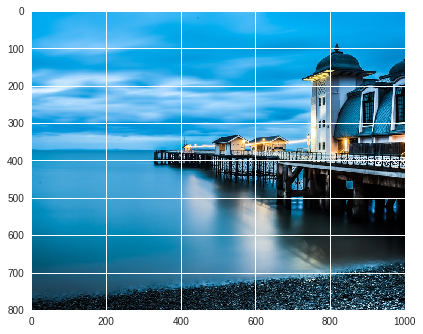

Original sum check:  278734339


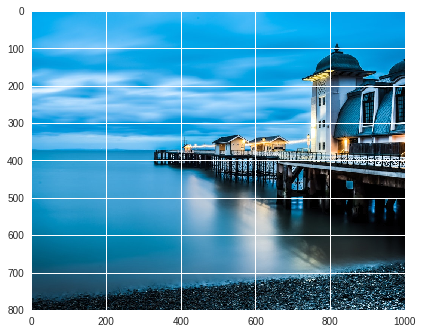

Filtered sum check:  278589873
#806526
#201a0f
#dfbf8c
#dda220
https://images.unsplash.com/photo-1476610182048-b716b8518aae?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&w=1000&q=80


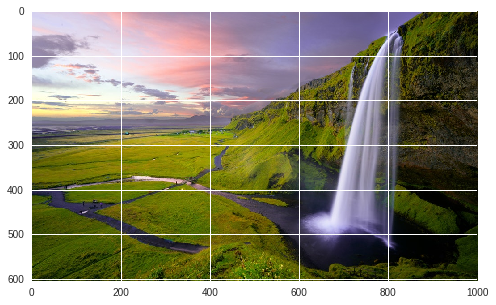

Original sum check:  177393264


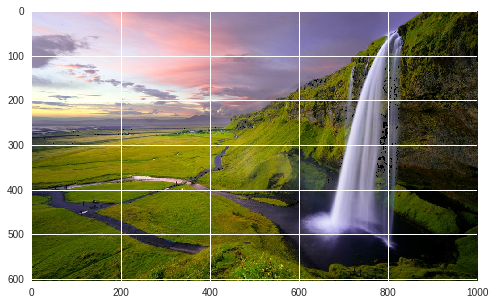

Filtered sum check:  176994430
#d2cce1
#106c69
#142825
#977d8b
https://image.shutterstock.com/image-photo/waterfall-landscape-scenery-260nw-781328740.jpg


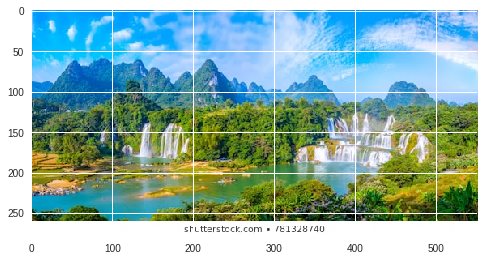

Original sum check:  65139038


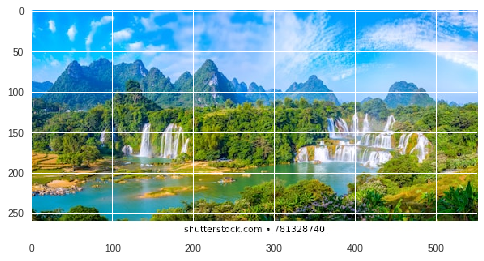

Filtered sum check:  65095626
#225033
#d69b27
#408f82
#f6d9b9
https://i.ytimg.com/vi/dTp72sci8CA/maxresdefault.jpg


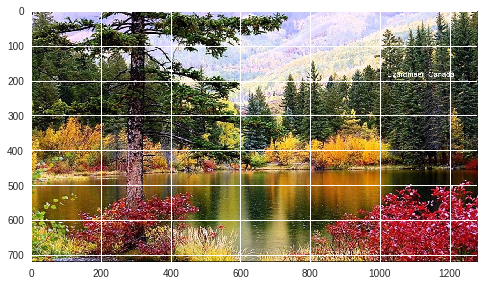

Original sum check:  278782582


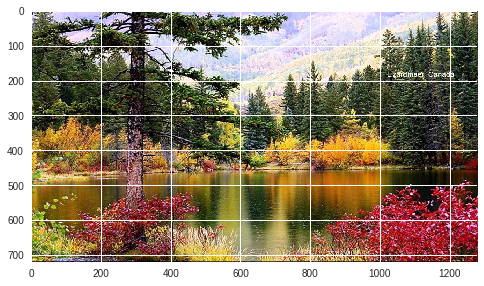

Filtered sum check:  278233813
#e1dbe2
#2f5374
#5e97b6
#122327


In [221]:
dominant_colors = []
k_clusters = 4

for url in url_list:
  print(url)
  dc = extract_dominant_colors(url, k_clusters = k_clusters)
  dominant_colors.append(dc)
  
#extract_dominant_colors(url, k_clusters = 4)